## If all that makes sense, then we can easily use the same process to create a high-pass filter
* If you low-pass the data, then high frequencies are discarded and only low-frequencies remain
* That means that the high frequency info in your data is equal to (original_signal - lp_filtered_signal)
* So if you have symetric filters, like our sinc functions, you can just invert it and you've got a high-pass filter that does the opposite of our low pass filter 
* Conceptually, a high-pass filter looks like our 'brick wall' low pass filter (see first part of last tutorial), except that it is zeros for low-frequencies and non-zero for high-frequencies

## Imports

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy import signal

# also define the default font we'll use for figures. 
fig_font = {'fontname':'Arial', 'size':'20'}

## Simulated timeseries

In [2]:
# our frequencies to work with
frequs = [5, 12, 17, 45, 58]
# first lets set up a more interesting signal with some higher frequencies
sr = 512                        # samp rate in Hz
tmax = 4                        # duration of signal, in s
dt = 1/sr                       # time step, reciprocal of the sr
t = np.arange(0,tmax,dt)        # time axis

# add up a bunch of sin waves at each of our desired frequencies
sig = np.zeros(len(t))
for f in np.arange(len(frequs)):
    sig = sig + np.sin(2*np.pi*frequs[f]*t)

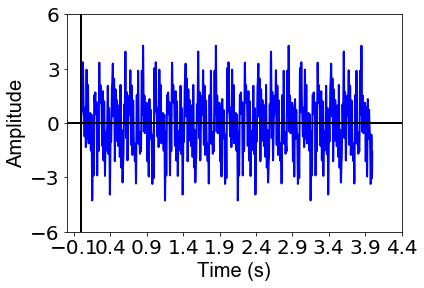

In [3]:
# Plot
plt.plot(t, sig, 'b-', linewidth = 2)    # specify x,y data...in this case time and amplitude of sin

# put some labels on the axes
plt.xlabel('Time (s)', **fig_font)
plt.ylabel('Amplitude', **fig_font)

# set the tick marks
plt.xticks(np.arange(-.1,tmax+.5,.5), color='k', size=20)
plt.yticks(np.linspace(-6,6,5), color='k', size=20)

# add some nice vertical/horizontal lines 
plt.axvline(0, color = 'k', linewidth = 2)
plt.axhline(0, color = 'k', linewidth = 2)

# show it
plt.show()

## Make our filter - just like with the low pass filter, but invert the filter

In [6]:
# First specify a cutoff frequency, fc
# just like the low pass filter, this is a fraction of the sampling rate over 0, .5
fc = 0.1 

# Then specify the transition band, again this will be a fraction of the sampling rate over 0, .5
b = 0.1  

# more on this below, but now need to make sure that ceil(4/b) is odd
N = int(np.ceil((4 / b)))

# make sure filter length is odd
if not N % 2: N += 1  
    
# generate span over which to eval sinc function    
n = np.arange(N)
 
# Compute the filter, taking into account our cutoff freq
sinc_func = np.sinc(2 * fc * (n - (N - 1) / 2.))
 
# generate our blackman window - just use np builtin this time
win = np.blackman(N)

# apply the windowing function 
sinc_func = sinc_func * win

# Normalize to have an area of 1 (unit area)
sinc_func = sinc_func / np.sum(sinc_func)

# invert it!
sinc_func = -1*sinc_func

# add 1 to middle of the inverted function 
sinc_func[int((N-1)/2)]+=1

## Plot our high pass filter

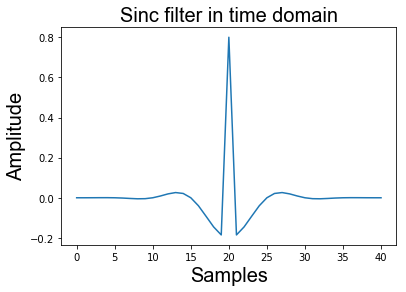

In [7]:
plt.plot(n, sinc_func)
plt.xlabel('Samples', **fig_font)
plt.ylabel('Amplitude', **fig_font)
plt.title('Sinc filter in time domain', **fig_font)
plt.show()

## Take a look at the filter in the frequency domain - should look our lp filters but in reverse

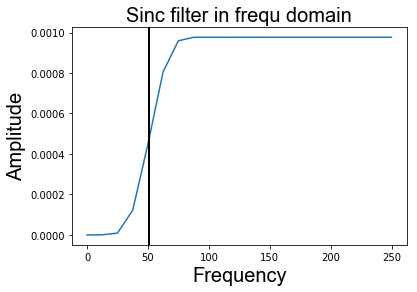

In [9]:
# take the fft, convert to amplitude, then normalize
sinc_fft = (np.abs(np.fft.rfft(sinc_func)) / len(sig) ) * 2

# figure out the frequency resolution of the data
# recall that our 'dt' here is calculated based on the signal 
# that we set up at the begining of the tutorial with a 
# sr = 512, so fc*512 should be around our filter fall-off
freq = np.fft.rfftfreq(sinc_func.size, dt)   

plt.plot(freq, sinc_fft)
plt.axvline(fc*sr, color = 'k', linewidth = 2)
plt.xlabel('Frequency', **fig_font)
plt.ylabel('Amplitude', **fig_font)
plt.title('Sinc filter in frequ domain', **fig_font)
plt.show()